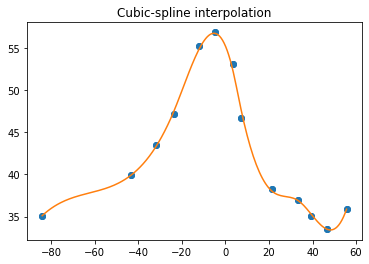

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
from scipy import interpolate
%matplotlib inline

df =  pd.read_csv('data/merged_pcv.csv',names = ['t','mtd','patient_id'])
uniques =df.patient_id.unique()
patient = df[df.patient_id == uniques[0]]


x = list(patient.t)
y = list(patient.mtd)

spl = interpolate.splrep(x, y, s=2)
x2 = np.linspace(x[0],x[-1], 200)
y2 = splev(x2, spl)


plt.figure()
plt.plot(x, y, 'o', x2, y2)
# plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')

plt.scatter(list(patient.t),list(patient.mtd))


plt.show()

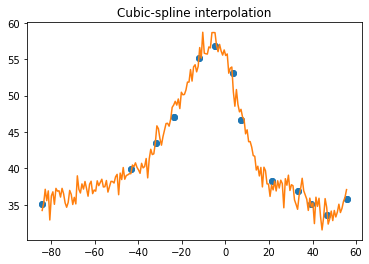

In [2]:
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, len(x2))
y2 = y2 +s

plt.figure()
plt.plot(x, y, 'o', x2, y2)
# plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')

plt.scatter(list(patient.t),list(patient.mtd))
plt.show()


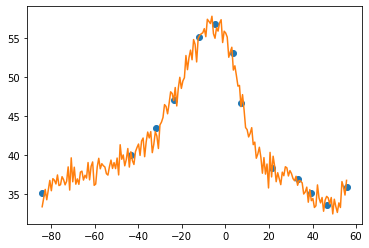

In [3]:
def generator(x,y):
#     if len(x) == 18:
#         print(x)
#         print(y)
    spl = interpolate.splrep(x, y, s=2)
    x2 = np.linspace(x[0],x[-1], 200)
    y2 = splev(x2, spl)
    mu, sigma = 0, 1 # mean and standard deviation
    s = np.random.normal(mu, sigma, len(x2))
    y2 = y2 +s
    return [x2,y2]

df =  pd.read_csv('data/merged_pcv.csv',names = ['t','mtd','patient_id'])
uniques =df.patient_id.unique()
patient = df[df.patient_id == uniques[0]]

x = list(patient.t)
y = list(patient.mtd)
[x2,y2] = generator(x,y)

plt.plot(x, y, 'o', x2, y2)
plt.show()

In [4]:
# generate a tone of data 
import csv
NUM_RANDOM = 5

i=0
open("out.csv", 'w').close()

with open("out.csv","w+") as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for patient_id in uniques:
        patient = df[df.patient_id == patient_id]
        x = sorted(list(patient.t))
        y = list(patient.mtd)
        for j in range(NUM_RANDOM):
            print(len(x),len(y))
            [gen_x,gen_y] = generator(x,y)
            gen_x=list(gen_x)
            gen_y=list(gen_y)
#             plt.plot(gen_x, gen_y)
#             plt.scatter(x, y)
#             plt.show()
#             break
#             print(y)
            for j in range(len(gen_y)):
                writer.writerow((gen_x[j],gen_y[j],i,patient_id,i%NUM_RANDOM))
            i+=1

            
        
        


13 13
13 13
13 13
13 13
13 13
12 12
12 12
12 12
12 12
12 12
11 11
11 11
11 11
11 11
11 11
14 14
14 14
14 14
14 14
14 14
18 18
18 18
18 18
18 18
18 18
11 11
11 11
11 11
11 11
11 11
14 14
14 14
14 14
14 14
14 14
10 10
10 10
10 10
10 10
10 10
12 12
12 12
12 12
12 12
12 12
6 6
6 6
6 6
6 6
6 6


In [5]:
df4 =  pd.read_csv('out.csv',names = ['t','mtd','gen_id','patient_id','rel_id'])
df4

,t,mtd,gen_id,patient_id,rel_id
0,-84.080717,36.415322,0,0,0
1,-83.378777,35.662864,0,0,0
2,-82.676837,35.608436,0,0,0
3,-81.974897,35.737944,0,0,0
4,-81.272957,36.370756,0,0,0
...,...,...,...,...,...
9995,12.631930,41.874822,49,206,4
9996,12.723975,42.855598,49,206,4
9997,12.816019,43.617974,49,206,4
9998,12.908064,43.150796,49,206,4


In [7]:
patient1 = df4.loc[(df4['rel_id'] == 1) & (df4['patient_id'] == 1)] 
patient1

,t,mtd,gen_id,patient_id,rel_id
1200,-74.215247,33.015673,6,1,1
1201,-73.669919,33.505187,6,1,1
1202,-73.124592,32.550656,6,1,1
1203,-72.579264,30.932565,6,1,1
1204,-72.033936,33.021894,6,1,1
...,...,...,...,...,...
1395,32.123623,37.887957,6,1,1
1396,32.668950,40.075017,6,1,1
1397,33.214278,42.451937,6,1,1
1398,33.759605,41.507968,6,1,1


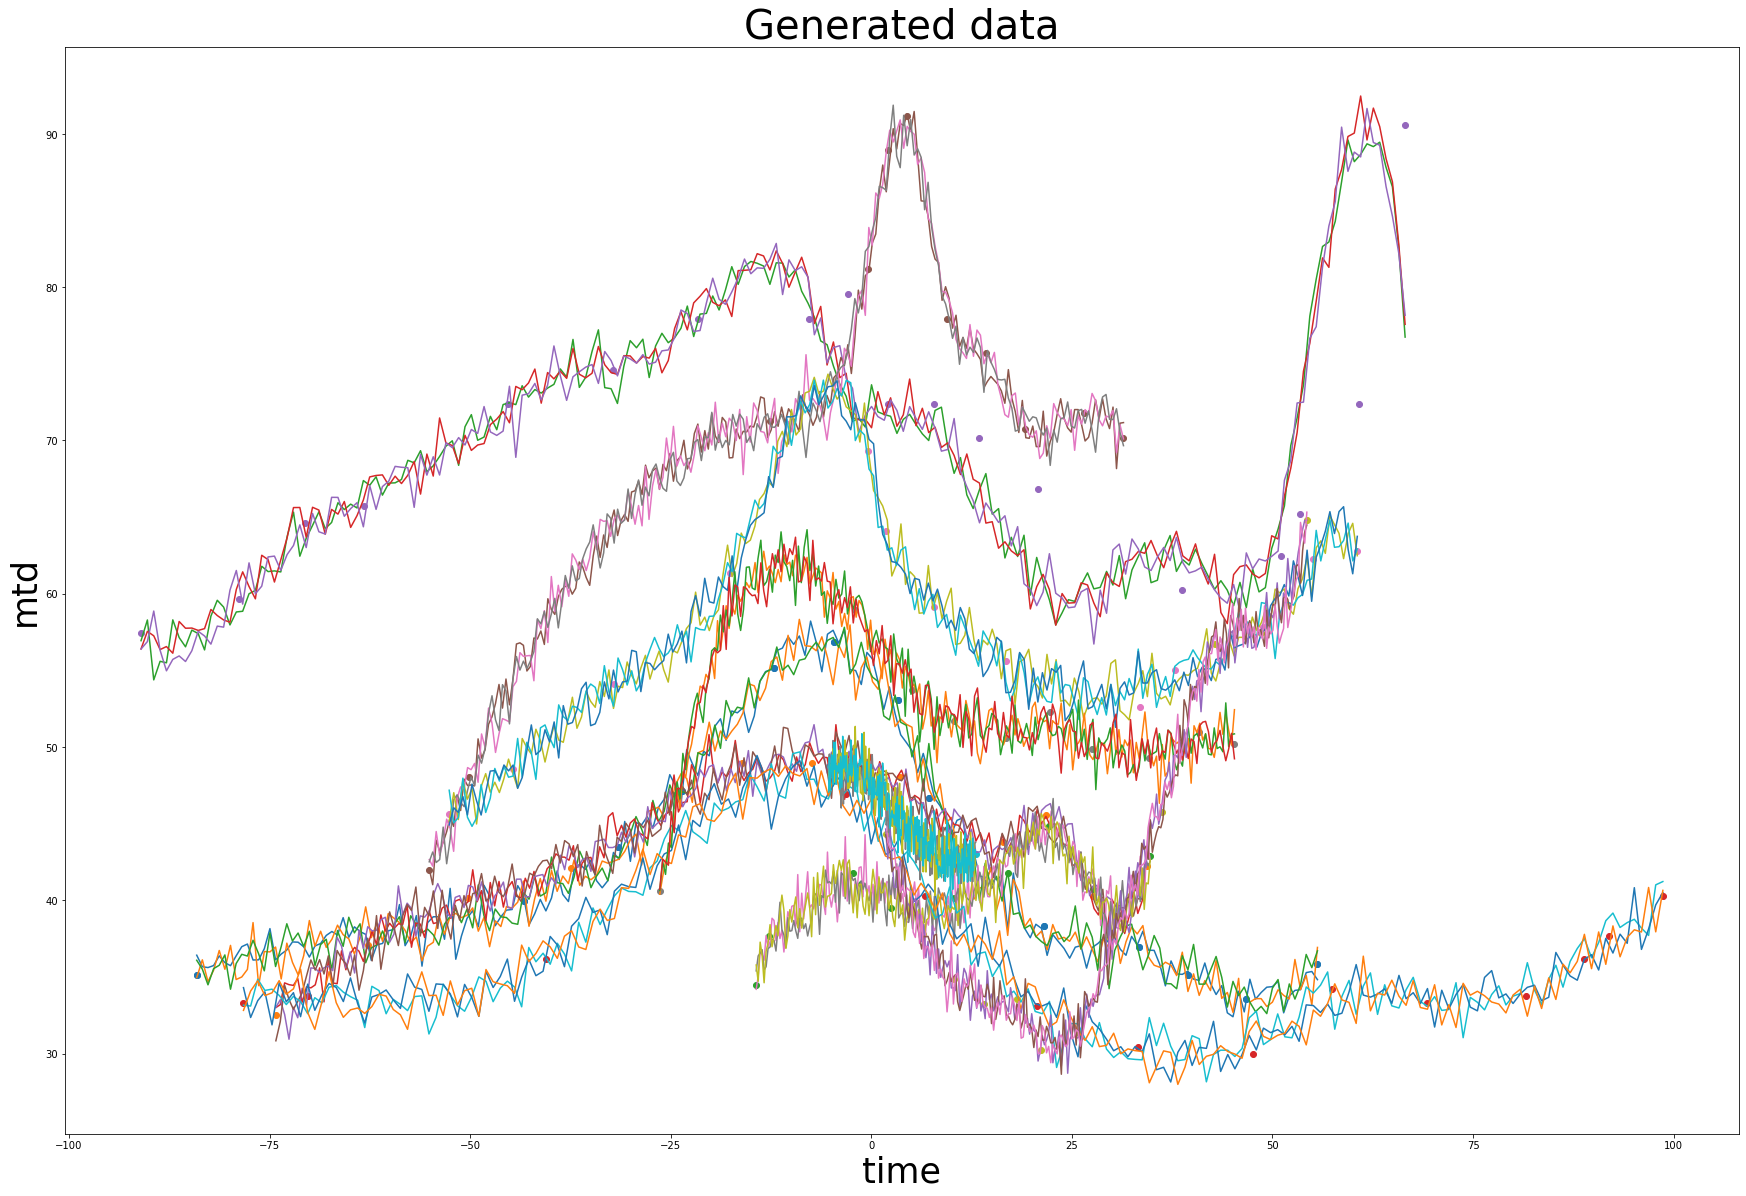

In [9]:
fig =plt.figure(figsize=(30,20))
for patient_id in uniques:
    patient = df[df.patient_id == patient_id]
    plt.scatter(patient.t, patient.mtd)
    
    for rel_id in range(3):
        patient1 = df4.loc[(df4['rel_id'] == rel_id) & (df4['patient_id'] == patient_id)] 
        plt.plot(patient1.t,patient1.mtd)
        
#     break


    
plt.scatter(df[df.patient_id == 0].t, df[df.patient_id == 0].mtd)

plt.title("Generated data",fontsize=40)
plt.xlabel('time', fontsize=35)
plt.ylabel('mtd', fontsize=35)



plt.show()

#### oversampling

1 

2

3